# Import Library yang diperlukan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

Load dataset

In [2]:
food_file = pd.ExcelFile('DATASET_cultural dimension of food consumption.xlsx')

Membaca file Excel yang berisi data makanan dan Menampilkan isi DataFrame

In [3]:
food = pd.read_excel(food_file)
food

,(A1) CITY,(A2) PROVINCE,(B3) GENDER,(B4) AGE,(B5) RELIGION,(B6) ETHNIC,(B7) EDUCATION LEVEL,(B8) LIVED IN URBAN AREA (YEARS),(B9) OCCUPATION,(B10) SOCIAL CLAS,...,(E19) RELIGIOUS VALUE IN EATING PLACES,(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN,(E21) CUSTOM VALUE IN TYPE OF FOOD,(E22) CUSTOM VALUE IN EATING PLACES,(E23) CUSTOM VALUE IN CONSUMPTION PATTERN,(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES,(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES,(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES,(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES,(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,Denpasar,Bali,Female,64,Islam,Java,Junior High School,24,Government Employees,Middle Class,...,Strongly Agree,Neither agree nor disagree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree
706,Denpasar,Bali,Male,51,Protestant,Java,Master and doctoral degree,24,Enterpreneur,Upper Class,...,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
707,Denpasar,Bali,Male,26,Hindu,Batak,Senior High School,26,Enterpreneur,Lower Class,...,Agree,Strongly Agree,Strongly Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree
708,Denpasar,Bali,Male,30,Hindu,Bali,Senior High School,30,Enterpreneur,Upper Class,...,Neither agree nor disagree,Strongly Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Agree,Strongly Agree,Strongly Agree


# EDA [Exploratory Data Analysis]
EDA merupakan tahap awal dalam proses analisis data yang bertujuan untuk:
- Memahami struktur data
- Mengetahui pola, anomali, atau outlier
- Menemukan hubungan antar variabel
- Mempersiapkan data untuk tahap analisis atau pemodelan selanjutnya

In [4]:
food.shape

(710, 28)

Dataset memiliki dimensi **710 baris** dan **28 kolom**.


In [5]:
food.columns

Index(['(A1) CITY', '(A2) PROVINCE', '(B3) GENDER', '(B4) AGE',
       '(B5) RELIGION', '(B6) ETHNIC', '(B7) EDUCATION LEVEL',
       '(B8) LIVED IN URBAN AREA (YEARS)', '(B9) OCCUPATION',
       '(B10) SOCIAL CLAS', '(B11) HOUSEHOLD MEMBER',
       '(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)',
       '(C13) TIME OF INCOME RECEIPT',
       '(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)',
       '(C15) % MONTHLY EXPENDITURE FOR FOOD', '(D16) HEALTH FACTOR',
       '(D17) PRICE FACTOR)', '(E18) RELIGIOUS VALUE IN TYPE OF FOOD',
       '(E19) RELIGIOUS VALUE IN EATING PLACES',
       '(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN',
       '(E21) CUSTOM VALUE IN TYPE OF FOOD',
       '(E22) CUSTOM VALUE IN EATING PLACES',
       '(E23) CUSTOM VALUE IN CONSUMPTION PATTERN',
       '(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES',
       '(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES',
       '(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RU

In [6]:
food.select_dtypes(include='object').columns

Index(['(A1) CITY', '(A2) PROVINCE', '(B3) GENDER', '(B5) RELIGION',
       '(B6) ETHNIC', '(B7) EDUCATION LEVEL', '(B9) OCCUPATION',
       '(B10) SOCIAL CLAS', '(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)',
       '(C13) TIME OF INCOME RECEIPT',
       '(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)',
       '(D16) HEALTH FACTOR', '(D17) PRICE FACTOR)',
       '(E18) RELIGIOUS VALUE IN TYPE OF FOOD',
       '(E19) RELIGIOUS VALUE IN EATING PLACES',
       '(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN',
       '(E21) CUSTOM VALUE IN TYPE OF FOOD',
       '(E22) CUSTOM VALUE IN EATING PLACES',
       '(E23) CUSTOM VALUE IN CONSUMPTION PATTERN',
       '(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES',
       '(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES',
       '(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES',
       '(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES',
       '(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD'],
 

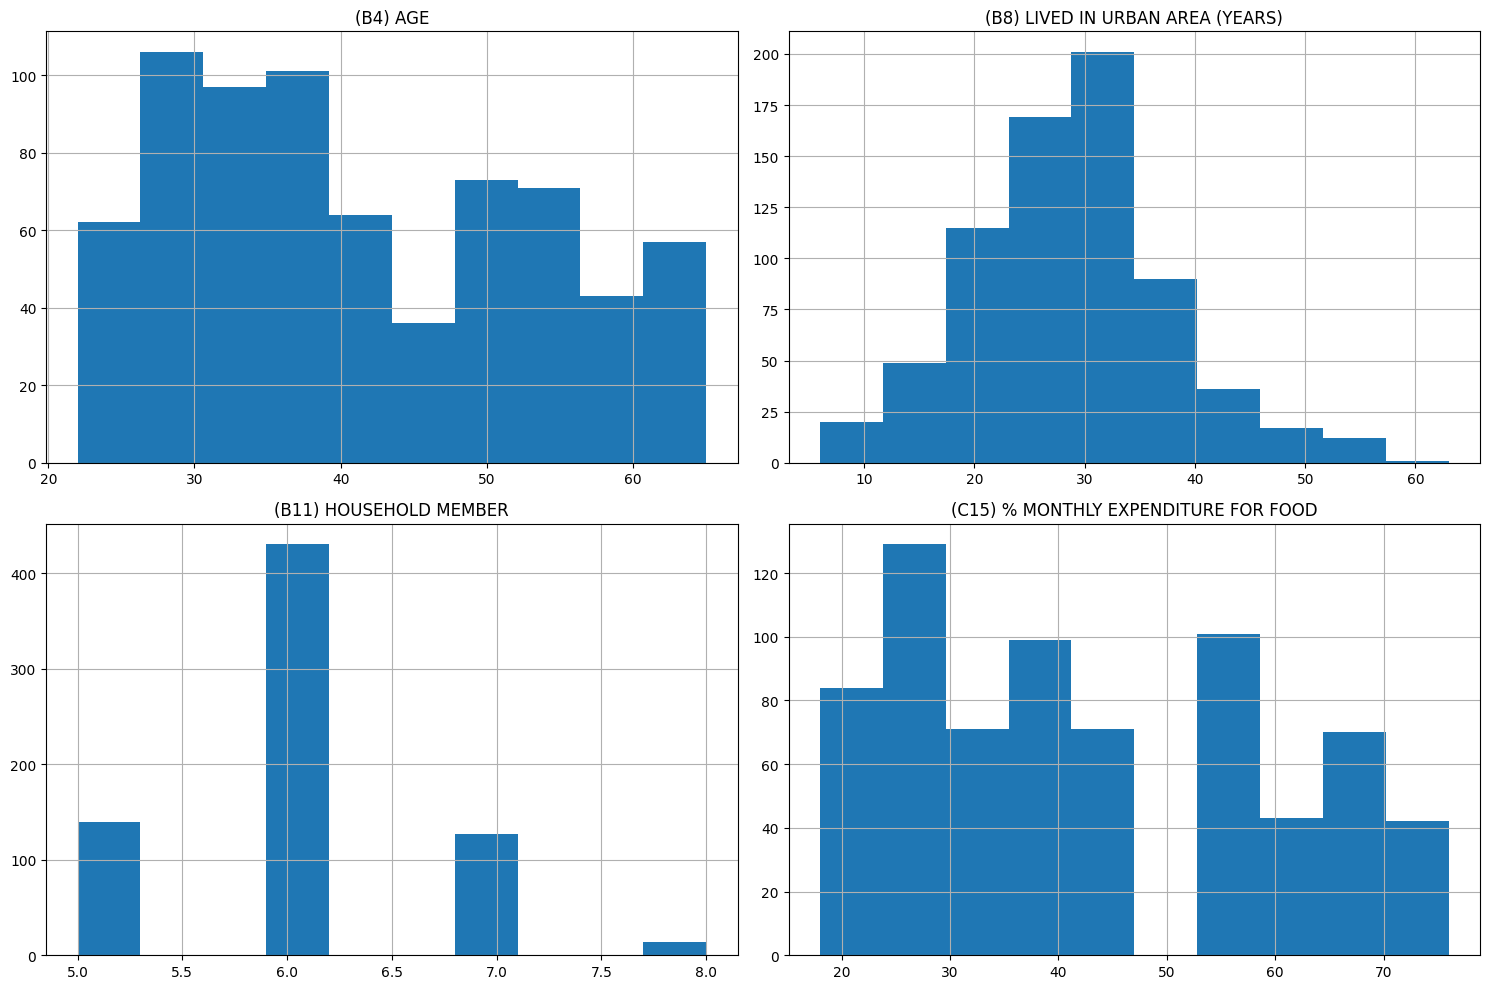

In [7]:
food.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Korelasi dan Deteksi Duplikasi
- Menampilkan korelasi antar fitur numerik dan menghitung jumlah data duplikat.

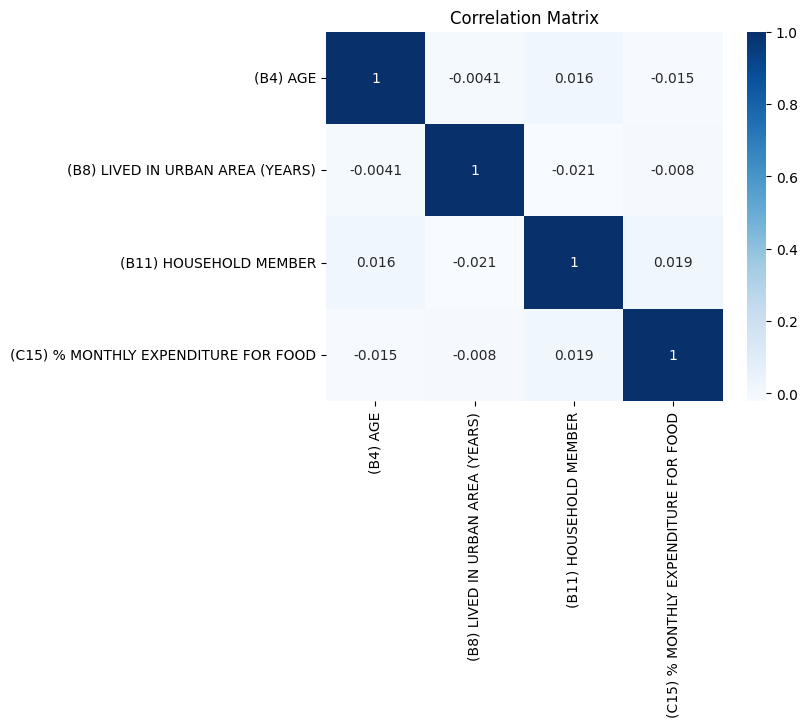

In [8]:
numerical_food = food.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_food.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


In [9]:
food.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
705,False
706,False
707,False
708,False


In [10]:
food.dtypes

,0
(A1) CITY,object
(A2) PROVINCE,object
(B3) GENDER,object
(B4) AGE,int64
(B5) RELIGION,object
(B6) ETHNIC,object
(B7) EDUCATION LEVEL,object
(B8) LIVED IN URBAN AREA (YEARS),int64
(B9) OCCUPATION,object
(B10) SOCIAL CLAS,object


 Statistik Deskriptif dan Distribusi
 - Menyediakan informasi tipe data, nilai null, dan statistik deskriptif untuk tiap kolom.

In [11]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

In [12]:
food.describe()

,(B4) AGE,(B8) LIVED IN URBAN AREA (YEARS),(B11) HOUSEHOLD MEMBER,(C15) % MONTHLY EXPENDITURE FOR FOOD
count,710.000000,710.000000,710.000000,710.000000
mean,41.308451,28.645070,6.022535,42.992958
std,11.948966,8.967781,0.673537,17.057811
min,22.000000,6.000000,5.000000,18.000000
25%,31.000000,23.000000,6.000000,26.000000
50%,39.000000,29.000000,6.000000,41.000000
75%,52.000000,34.000000,6.000000,58.000000
max,65.000000,63.000000,8.000000,76.000000


In [13]:
food.duplicated().sum()


np.int64(0)

In [14]:
for col in food.select_dtypes(include='object').columns:
    print(food[col].value_counts(), '\n')

(A1) CITY
Jakarta     174
Bandung     150
Denpasar    148
Makasar     120
Surabaya    118
Name: count, dtype: int64 

(A2) PROVINCE
DKI Jakarta       174
West Java         150
Bali              148
South Sulawesi    120
East Java         118
Name: count, dtype: int64 

(B3) GENDER
Female    411
Male      299
Name: count, dtype: int64 

(B5) RELIGION
Islam         427
Protestant    112
Catholic      101
Hindu          66
Budha           3
Other           1
Name: count, dtype: int64 

(B6) ETHNIC
Java      289
Sunda      97
Bali       73
Minang     61
Madura     58
Other      56
Batak      51
Bugis      25
Name: count, dtype: int64 

(B7) EDUCATION LEVEL
Bachelor degree               212
Senior High School            181
Diploma                       156
Master and doctoral degree    100
Junior High School             37
Primary School                 24
Name: count, dtype: int64 

(B9) OCCUPATION
Private Employees       205
Government Employees    202
Enterpreneur            193
Indepen

Visualisasi distribusi dari beberapa fitur penting menggunakan histogram.

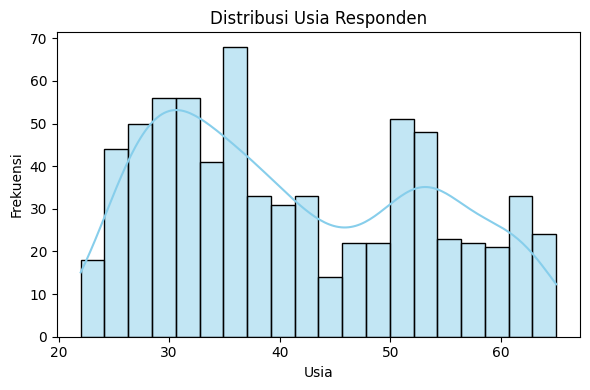

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(food['(B4) AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Responden')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

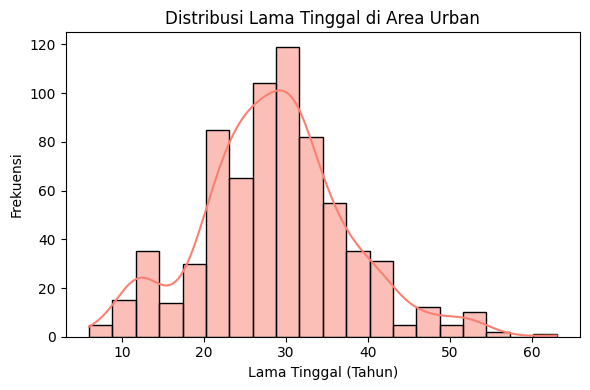

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(food['(B8) LIVED IN URBAN AREA (YEARS)'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Lama Tinggal di Area Urban')
plt.xlabel('Lama Tinggal (Tahun)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

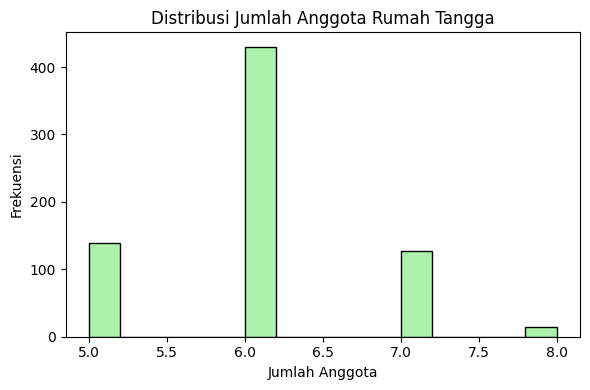

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(food['(B11) HOUSEHOLD MEMBER'], bins=15, kde=False, color='lightgreen')
plt.title('Distribusi Jumlah Anggota Rumah Tangga')
plt.xlabel('Jumlah Anggota')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

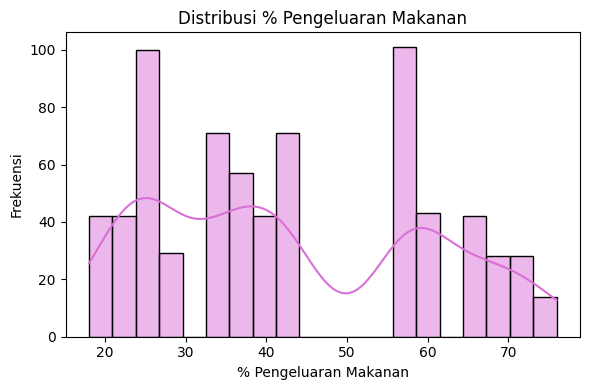

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(food['(C15) % MONTHLY EXPENDITURE FOR FOOD'], bins=20, kde=True, color='orchid')
plt.title('Distribusi % Pengeluaran Makanan')
plt.xlabel('% Pengeluaran Makanan')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# PRE-PROCESSING
Preprocessing bertujuan membersihkan dan menyiapkan data agar bisa digunakan dalam analisis lebih lanjut.
Tahapan yang dilakukan:
- Mengganti nama kolom menjadi nama yang lebih deskriptif dan mudah dipahami.
- Menghapus kolom tidak relevan, seperti identitas demografis jika tidak digunakan untuk clustering.
- Mengatasi data kategorikal:
Ordinal Encoding untuk skala Likert (karena urutan penting).
Label Encoding untuk fitur kategorikal non-ordinal.
- Menormalisasi data dengan MinMaxScaler agar semua fitur berada dalam skala yang setara (0–1)

Cek Missing Values dan Outlier
- Menampilkan jumlah nilai yang hilang serta mendeteksi outlier menggunakan boxplot.

In [19]:
missing = food.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


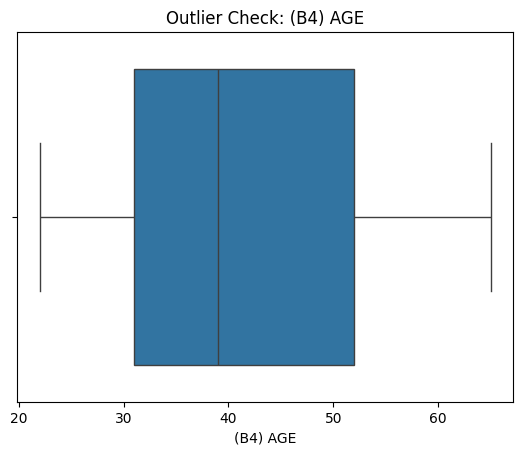

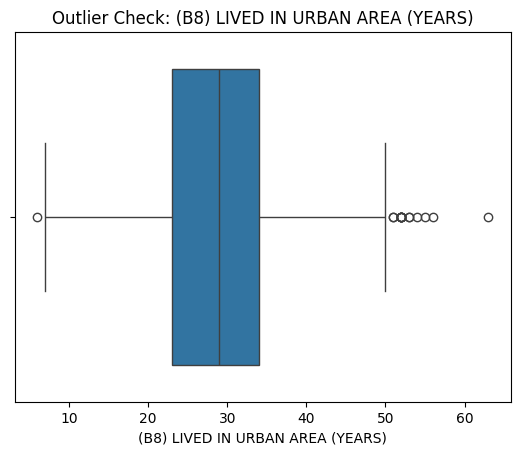

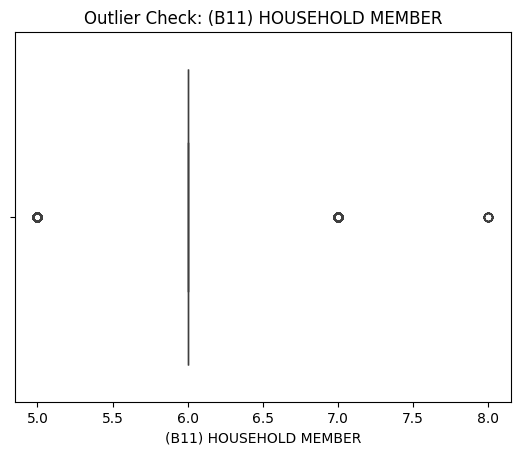

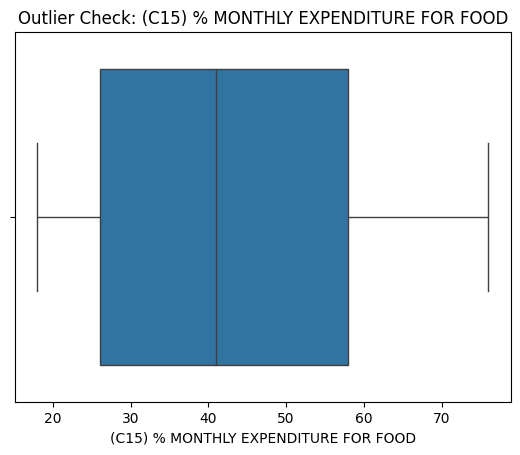

In [20]:
for col in food.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=food, x=col)
    plt.title(f"Outlier Check: {col}")
    plt.show()


In [21]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   (A1) CITY                                                              710 non-null    object
 1   (A2) PROVINCE                                                          710 non-null    object
 2   (B3) GENDER                                                            710 non-null    object
 3   (B4) AGE                                                               710 non-null    int64 
 4   (B5) RELIGION                                                          710 non-null    object
 5   (B6) ETHNIC                                                            710 non-null    object
 6   (B7) EDUCATION LEVEL                                                   710 non-null    object
 7  

Ganti Nama Kolom
- Mengganti nama kolom dari format panjang menjadi versi bahasa Indonesia yang lebih ringkas dan mudah dibaca.

In [22]:
food.rename(columns={
    '(A1) CITY': 'Kota',
    '(A2) PROVINCE': 'Provinsi',
    '(B3) GENDER': 'Jenis_Kelamin',
    '(B4) AGE': 'Usia',
    '(B5) RELIGION': 'Agama',
    '(B6) ETHNIC': 'Etnis',
    '(B7) EDUCATION LEVEL': 'Tingkat_Pendidikan',
    '(B8) LIVED IN URBAN AREA (YEARS)': 'Lama_Tinggal_Di_Perkotaan',
    '(B9) OCCUPATION': 'Pekerjaan',
    '(B10) SOCIAL CLAS': 'Kelas_Sosial',
    '(B11) HOUSEHOLD MEMBER': 'Jumlah_Anggota_Keluarga',
    '(C12) HOUSEHOLD INCOME (MONTHLY IN MILLION IDR)': 'Pendapatan_Keluarga_Juta_IDR',
    '(C13) TIME OF INCOME RECEIPT': 'Waktu_Menerima_Pendapatan',
    '(C14) HOUSEHOLD EXPENDITURE (MONTHLY IN MILLION IDR)': 'Pengeluaran_Keluarga_Juta_IDR',
    '(C15) % MONTHLY EXPENDITURE FOR FOOD': 'Persentase_Pengeluaran_Untuk_Makanan',
    '(D16) HEALTH FACTOR': 'Faktor_Kesehatan',
    '(D17) PRICE FACTOR)': 'Faktor_Harga',
    '(E18) RELIGIOUS VALUE IN TYPE OF FOOD': 'Nilai_Keagamaan_Pada_Jenis_Makanan',
    '(E19) RELIGIOUS VALUE IN EATING PLACES': 'Nilai_Keagamaan_Pada_Tempat_Makan',
    '(E20) RELIGIOUS VALUE IN CONSUMPTION PATTERN': 'Nilai_Keagamaan_Pada_Pola_Konsumsi',
    '(E21) CUSTOM VALUE IN TYPE OF FOOD': 'Nilai_Adat_Pada_Jenis_Makanan',
    '(E22) CUSTOM VALUE IN EATING PLACES': 'Nilai_Adat_Pada_Tempat_Makan',
    '(E23) CUSTOM VALUE IN CONSUMPTION PATTERN': 'Nilai_Adat_Pada_Pola_Konsumsi',
    '(24) PRACTICE OF FOOD CONSUMPTION BASED ON RELIGIOUS RULES': 'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan',
    '(25) PRACTICE OF FOOD CONSUMPTION BASED ON CUSTOM RULES': 'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat',
    '(E26) BUYING FOOD PRODUCT IN THE RIGHT PLACE BASED ON RELIGIOUS RULES': 'Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan',
    '(E27 TYPE OF DISHES VARIATION BASED ON RELIGIOUS RULES': 'Variasi_Hidangan_Sesuai_Aturan_Keagamaan',
    '(E28) PRACTICE OF CONSUMING TRADITIONAL FOOD': 'Praktik_Mengkonsumsi_Makanan_Tradisional'
}, inplace=True)
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Kota                                                   710 non-null    object
 1   Provinsi                                               710 non-null    object
 2   Jenis_Kelamin                                          710 non-null    object
 3   Usia                                                   710 non-null    int64 
 4   Agama                                                  710 non-null    object
 5   Etnis                                                  710 non-null    object
 6   Tingkat_Pendidikan                                     710 non-null    object
 7   Lama_Tinggal_Di_Perkotaan                              710 non-null    int64 
 8   Pekerjaan                                              710 n

# Feature Engineering
Feature Engineering adalah proses mengubah atau membuat fitur baru yang lebih informatif.
Langkah yang dilakukan:
- Reduksi dimensi dengan PCA: Menyederhanakan fitur menjadi 2 komponen utama (PC1 dan PC2) agar bisa divisualisasikan dan diklaster dengan lebih efektif.
- Membuat skor komposit untuk tema tertentu:
- Skor Ekonomi: gabungan dari variabel terkait pengeluaran dan konsumsi.
- Skor Keagamaan: gabungan dari persepsi dan kebiasaan terkait agama.
- Skor Adat: gabungan dari variabel terkait nilai-nilai budaya dan lokalitas.

Hapus Kolom Tidak Relevan
- Menghapus kolom-kolom yang tidak digunakan dalam analisis lanjutan.

In [23]:
drop_cols = ['Jenis_Kelamin', 'Usia', 'Kota', 'Provinsi']
food_df = food.drop(columns=drop_cols)

print(food_df.columns)

Index(['Agama', 'Etnis', 'Tingkat_Pendidikan', 'Lama_Tinggal_Di_Perkotaan',
       'Pekerjaan', 'Kelas_Sosial', 'Jumlah_Anggota_Keluarga',
       'Pendapatan_Keluarga_Juta_IDR', 'Waktu_Menerima_Pendapatan',
       'Pengeluaran_Keluarga_Juta_IDR', 'Persentase_Pengeluaran_Untuk_Makanan',
       'Faktor_Kesehatan', 'Faktor_Harga',
       'Nilai_Keagamaan_Pada_Jenis_Makanan',
       'Nilai_Keagamaan_Pada_Tempat_Makan',
       'Nilai_Keagamaan_Pada_Pola_Konsumsi', 'Nilai_Adat_Pada_Jenis_Makanan',
       'Nilai_Adat_Pada_Tempat_Makan', 'Nilai_Adat_Pada_Pola_Konsumsi',
       'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan',
       'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat',
       'Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan',
       'Variasi_Hidangan_Sesuai_Aturan_Keagamaan',
       'Praktik_Mengkonsumsi_Makanan_Tradisional'],
      dtype='object')


Encoding Skala Likert
- Mengubah nilai-nilai skala Likert menjadi bentuk numerik untuk analisis lebih lanjut.

In [24]:
from sklearn.preprocessing import OrdinalEncoder
food_encoded = food_df.copy()

# Skala Likert
likert_scale = ['Strongly Disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly Agree']

# kolom Likert
likert_columns = [
    'Nilai_Keagamaan_Pada_Tempat_Makan',
    'Nilai_Keagamaan_Pada_Pola_Konsumsi',
    'Nilai_Adat_Pada_Jenis_Makanan',
    'Nilai_Adat_Pada_Tempat_Makan',
    'Nilai_Adat_Pada_Pola_Konsumsi',
    'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan',
    'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat',
    'Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan',
    'Variasi_Hidangan_Sesuai_Aturan_Keagamaan',
    'Praktik_Mengkonsumsi_Makanan_Tradisional'
]

for col in likert_columns:
    food_encoded[col] = food_encoded[col].astype(str).str.strip()
ordinal_encoder = OrdinalEncoder(categories=[likert_scale] * len(likert_columns))
food_encoded[likert_columns] = ordinal_encoder.fit_transform(food_encoded[likert_columns])
food_encoded

,Agama,Etnis,Tingkat_Pendidikan,Lama_Tinggal_Di_Perkotaan,Pekerjaan,Kelas_Sosial,Jumlah_Anggota_Keluarga,Pendapatan_Keluarga_Juta_IDR,Waktu_Menerima_Pendapatan,Pengeluaran_Keluarga_Juta_IDR,...,Nilai_Keagamaan_Pada_Tempat_Makan,Nilai_Keagamaan_Pada_Pola_Konsumsi,Nilai_Adat_Pada_Jenis_Makanan,Nilai_Adat_Pada_Tempat_Makan,Nilai_Adat_Pada_Pola_Konsumsi,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat,Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan,Variasi_Hidangan_Sesuai_Aturan_Keagamaan,Praktik_Mengkonsumsi_Makanan_Tradisional
0,Islam,Java,Senior High School,31,Private Employees,Lower Class,5,03:08:00,Daily,03:02:00,...,2.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
1,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,6,04:02:00,Weekly,04:01:00,...,3.0,3.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,4.0
2,Islam,Java,Senior High School,24,Private Employees,Middle Class,5,05:08:00,Weekly,05:05:00,...,3.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
3,Islam,Other,Senior High School,32,Private Employees,Lower Class,5,03:01:00,Daily,02:08:00,...,3.0,2.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0
4,Protestant,Batak,Primary School,43,Government Employees,Lower Class,6,03:04:00,Daily,03:01:00,...,4.0,2.0,2.0,2.0,4.0,4.0,3.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,Islam,Java,Junior High School,24,Government Employees,Middle Class,6,06:07:00,Weekly,06:07:00,...,4.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0
706,Protestant,Java,Master and doctoral degree,24,Enterpreneur,Upper Class,6,10:09:00,Monthly,10:09:00,...,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
707,Hindu,Batak,Senior High School,26,Enterpreneur,Lower Class,6,03:09:00,Daily,03:09:00,...,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
708,Hindu,Bali,Senior High School,30,Enterpreneur,Upper Class,6,09:08:00,Monthly,09:06:00,...,2.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0


Label Encoding Kolom Kategorikal
- Encode semua kolom bertipe objek menggunakan LabelEncoder.

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in food_encoded.columns:
    if food_encoded[col].dtype == 'object':
        food_encoded[col] = label_encoder.fit_transform(food_encoded[col])
food_encoded

,Agama,Etnis,Tingkat_Pendidikan,Lama_Tinggal_Di_Perkotaan,Pekerjaan,Kelas_Sosial,Jumlah_Anggota_Keluarga,Pendapatan_Keluarga_Juta_IDR,Waktu_Menerima_Pendapatan,Pengeluaran_Keluarga_Juta_IDR,...,Nilai_Keagamaan_Pada_Tempat_Makan,Nilai_Keagamaan_Pada_Pola_Konsumsi,Nilai_Adat_Pada_Jenis_Makanan,Nilai_Adat_Pada_Tempat_Makan,Nilai_Adat_Pada_Pola_Konsumsi,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat,Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan,Variasi_Hidangan_Sesuai_Aturan_Keagamaan,Praktik_Mengkonsumsi_Makanan_Tradisional
0,3,3,5,31,4,0,5,10,0,12,...,2.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0
1,3,3,0,32,4,0,6,13,2,20,...,3.0,3.0,4.0,3.0,3.0,1.0,2.0,2.0,2.0,4.0
2,3,3,5,24,4,1,5,18,2,32,...,3.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0
3,3,6,5,32,4,0,5,4,0,8,...,3.0,2.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0
4,5,1,4,43,1,0,6,6,0,11,...,4.0,2.0,2.0,2.0,4.0,4.0,3.0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,3,3,2,24,1,1,6,22,2,44,...,4.0,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0
706,5,3,3,24,0,2,6,29,1,63,...,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
707,2,1,5,26,0,0,6,11,0,19,...,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0
708,2,0,5,30,0,2,6,25,1,51,...,2.0,4.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,4.0


Normalisasi Data
- Melakukan normalisasi semua fitur ke rentang [0, 1] menggunakan Min-Max Scaling.

In [26]:
from sklearn.preprocessing import MinMaxScaler

X = food_encoded.copy()
ms = MinMaxScaler()
X_scaled = ms.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df

,Agama,Etnis,Tingkat_Pendidikan,Lama_Tinggal_Di_Perkotaan,Pekerjaan,Kelas_Sosial,Jumlah_Anggota_Keluarga,Pendapatan_Keluarga_Juta_IDR,Waktu_Menerima_Pendapatan,Pengeluaran_Keluarga_Juta_IDR,...,Nilai_Keagamaan_Pada_Tempat_Makan,Nilai_Keagamaan_Pada_Pola_Konsumsi,Nilai_Adat_Pada_Jenis_Makanan,Nilai_Adat_Pada_Tempat_Makan,Nilai_Adat_Pada_Pola_Konsumsi,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan,Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat,Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan,Variasi_Hidangan_Sesuai_Aturan_Keagamaan,Praktik_Mengkonsumsi_Makanan_Tradisional
0,0.6,0.428571,1.0,0.438596,0.8,0.0,0.000000,0.263158,0.0,0.133333,...,0.333333,0.666667,1.000000,0.333333,0.333333,0.333333,0.000000,0.333333,0.666667,0.666667
1,0.6,0.428571,0.0,0.456140,0.8,0.0,0.333333,0.342105,1.0,0.222222,...,0.666667,0.666667,1.000000,0.666667,0.666667,0.000000,0.333333,0.333333,0.333333,1.000000
2,0.6,0.428571,1.0,0.315789,0.8,0.5,0.000000,0.473684,1.0,0.355556,...,0.666667,0.333333,0.333333,0.000000,0.666667,0.000000,0.333333,0.333333,0.333333,0.333333
3,0.6,0.857143,1.0,0.456140,0.8,0.0,0.000000,0.105263,0.0,0.088889,...,0.666667,0.333333,0.666667,0.333333,0.666667,0.666667,0.333333,0.000000,0.333333,0.666667
4,1.0,0.142857,0.8,0.649123,0.2,0.0,0.333333,0.157895,0.0,0.122222,...,1.000000,0.333333,0.333333,0.333333,1.000000,1.000000,0.666667,0.000000,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.6,0.428571,0.4,0.315789,0.2,0.5,0.333333,0.578947,1.0,0.488889,...,1.000000,0.333333,0.666667,1.000000,1.000000,1.000000,0.333333,0.666667,0.333333,0.333333
706,1.0,0.428571,0.6,0.315789,0.0,1.0,0.333333,0.763158,0.5,0.700000,...,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
707,0.4,0.142857,1.0,0.350877,0.0,0.0,0.333333,0.289474,0.0,0.211111,...,0.666667,1.000000,1.000000,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000
708,0.4,0.000000,1.0,0.421053,0.0,1.0,0.333333,0.657895,0.5,0.566667,...,0.333333,1.000000,0.666667,0.333333,0.333333,0.333333,1.000000,0.666667,1.000000,1.000000


Lihat korelasi antar fitur Setelah Normalisasi
- Visualisasi korelasi antar fitur setelah dinormalisasi.

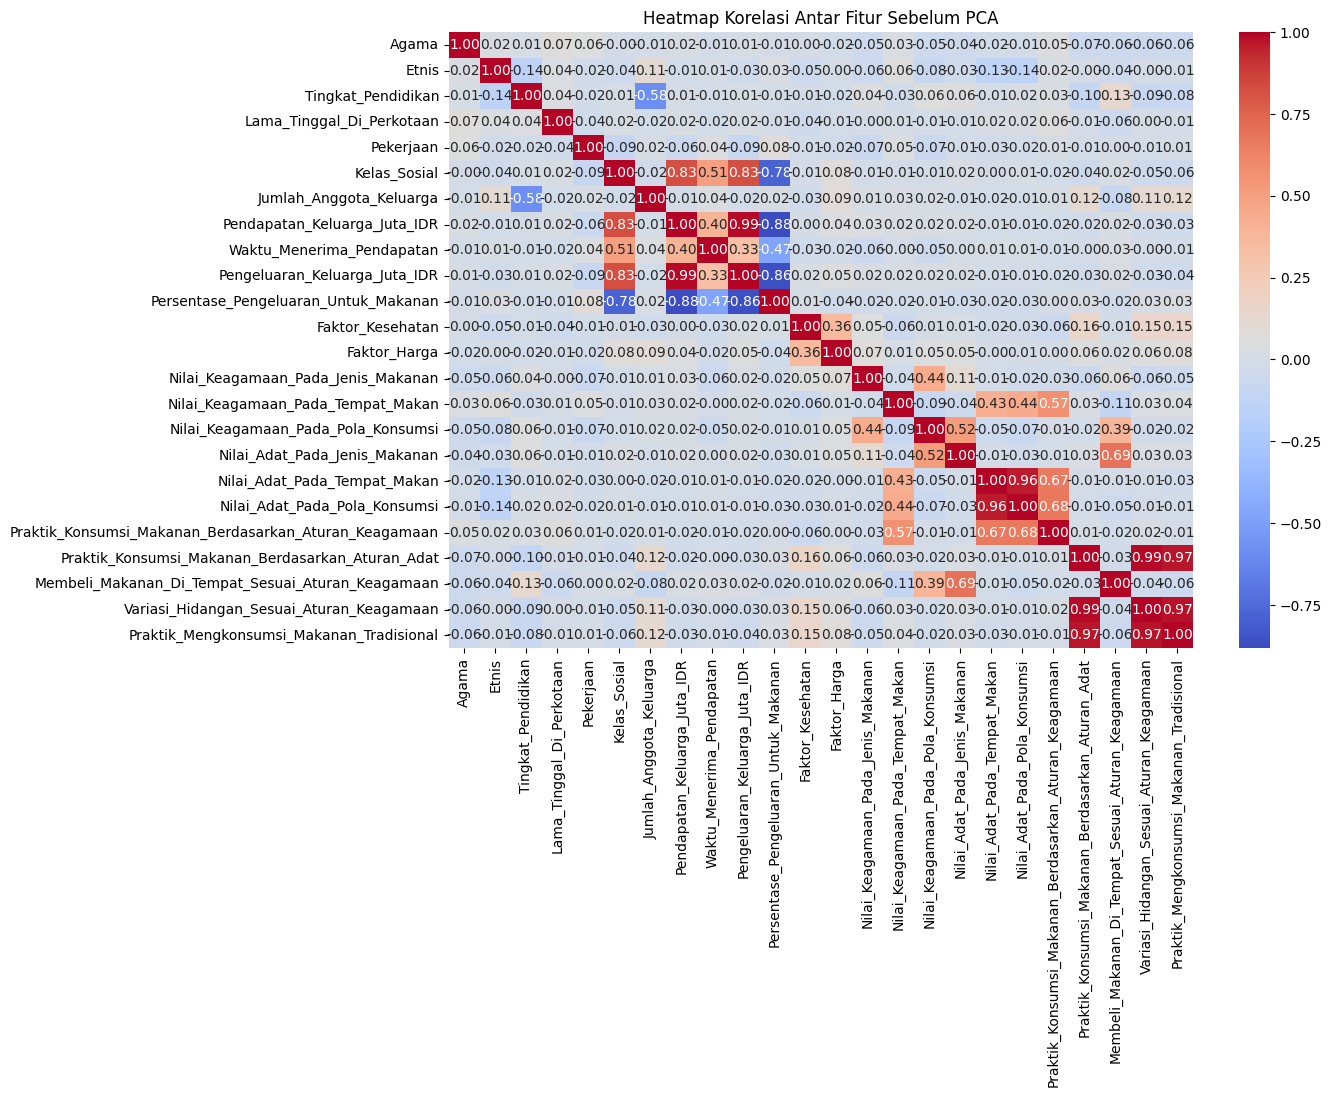

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Sebelum PCA")
plt.show()

PCA (Principal Component Analysis)
- Reduksi dimensi menjadi 2 komponen utama untuk visualisasi dan clustering.

Hasil Transformasi PCA (2 Komponen Utama):
        PC1       PC2
0 -0.779761 -0.344947
1 -0.188837  0.249556
2  0.259054 -0.344681
3 -0.905505 -0.207338
4 -0.844127  0.285545

Proporsi Variansi yang Dijelaskan:
[0.19858563 0.13095545]


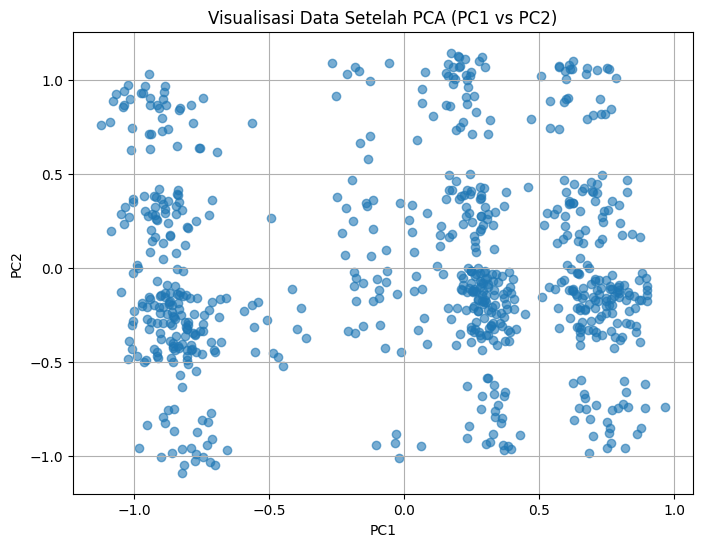

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

print("Hasil Transformasi PCA (2 Komponen Utama):")
print(pca_df.head())

print("\nProporsi Variansi yang Dijelaskan:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.6)
plt.title("Visualisasi Data Setelah PCA (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



# K-MEANS CLUSTERING
Clustering bertujuan untuk mengelompokkan data berdasarkan kemiripan pola konsumsi makanan.
Langkah-langkah:
- Menentukan jumlah klaster optimal menggunakan elbow method (dari nilai inertia).
- Menggunakan algoritma KMeans untuk mengelompokkan data ke dalam 3 klaster utama.
- Evaluasi hasil klaster menggunakan:
- Silhouette Score (semakin tinggi = semakin baik pemisahan antar klaster).
- Davies-Bouldin Index (semakin rendah = semakin baik pemisahan).

Elbow Method (Menentukan Jumlah Cluster)
- Menggunakan metode elbow untuk menentukan jumlah optimal cluster KMeans.

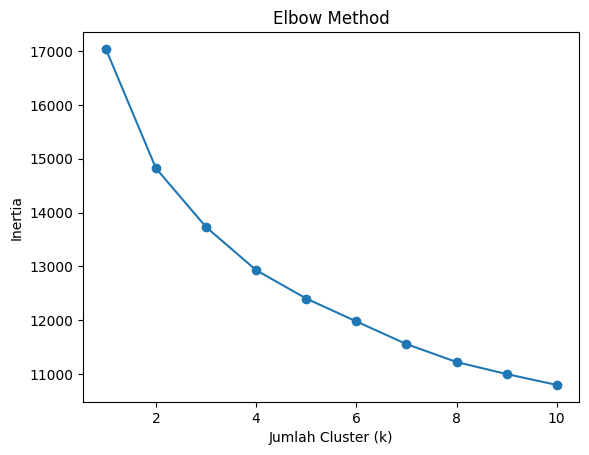

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = X_scaled_df.copy()
X_scaled = scaler.fit_transform(X_scaled)

# Elbow Method untuk menentukan jumlah cluster
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

KMeans Clustering, Visualisasi, dan Evaluasi
- Melakukan clustering dengan KMeans dan menambahkan label cluster ke hasil PCA.
- Mengukur kualitas cluster menggunakan Silhouette Score dan Davies-Bouldin Index.

Silhouette Score: 0.1358
Davies-Bouldin Index: 2.4913


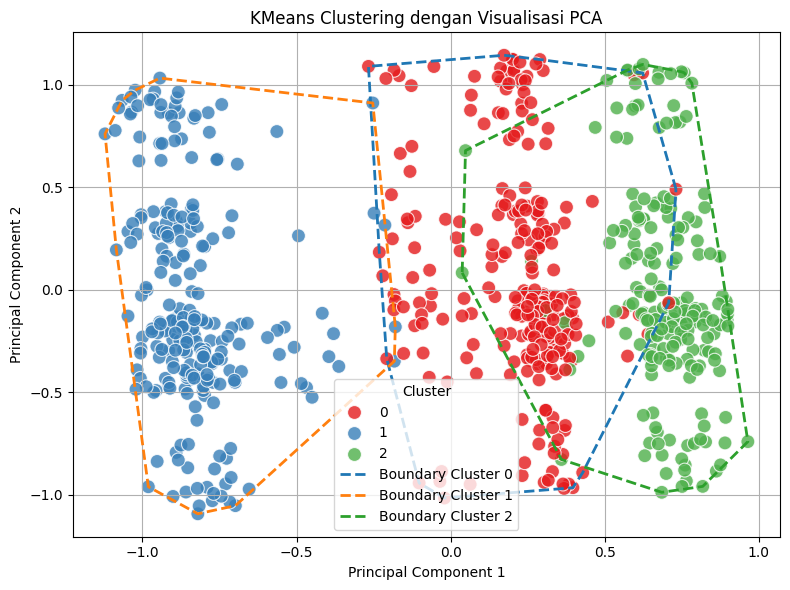

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial import ConvexHull
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df)

pca_df['Cluster'] = clusters

sil_score = silhouette_score(X_scaled_df, clusters)
db_score = davies_bouldin_score(X_scaled_df, clusters)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=100, alpha=0.8)

for cluster in range(k):
    points = pca_df[pca_df['Cluster'] == cluster][['PC1', 'PC2']].values
    if len(points) >= 3:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        hull_points = np.append(hull_points, [hull_points[0]], axis=0)
        plt.plot(hull_points[:, 0], hull_points[:, 1], linestyle='--', linewidth=2, label=f'Boundary Cluster {cluster}')

plt.title("KMeans Clustering dengan Visualisasi PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


Rangkuman Cluster
- Menghitung nilai rata-rata tiap fitur dalam tiap cluster.

In [32]:
food_encoded['Cluster'] = clusters
cluster_summary = food_encoded.groupby('Cluster').mean()
print(cluster_summary)

            Agama     Etnis  Tingkat_Pendidikan  Lama_Tinggal_Di_Perkotaan  \
Cluster                                                                      
0        2.898496  3.665414            2.078947                  28.221805   
1        2.937500  3.579167            2.133333                  28.650000   
2        2.950980  3.362745            2.284314                  29.191176   

         Pekerjaan  Kelas_Sosial  Jumlah_Anggota_Keluarga  \
Cluster                                                     
0         2.067669      1.022556                 6.075188   
1         1.933333      0.000000                 6.016667   
2         1.558824      1.960784                 5.960784   

         Pendapatan_Keluarga_Juta_IDR  Waktu_Menerima_Pendapatan  \
Cluster                                                            
0                           17.011278                   1.969925   
1                            6.491667                   0.000000   
2                           30.

 Skor Komposit untuk Tiap Aspek
 - Menyusun skor ringkasan untuk aspek ekonomi, keagamaan, dan adat berdasarkan fitur relevan.

In [33]:
cluster_summary['Skor_Ekonomi'] = cluster_summary[['Pendapatan_Keluarga_Juta_IDR', 'Pengeluaran_Keluarga_Juta_IDR', 'Kelas_Sosial']].mean(axis=1)
cluster_summary['Skor_Keagamaan'] = cluster_summary[['Nilai_Keagamaan_Pada_Jenis_Makanan', 'Nilai_Keagamaan_Pada_Tempat_Makan', 'Nilai_Keagamaan_Pada_Pola_Konsumsi', 'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Keagamaan', 'Membeli_Makanan_Di_Tempat_Sesuai_Aturan_Keagamaan']].mean(axis=1)
cluster_summary['Skor_Adat'] = cluster_summary[['Nilai_Adat_Pada_Jenis_Makanan', 'Nilai_Adat_Pada_Tempat_Makan', 'Nilai_Adat_Pada_Pola_Konsumsi', 'Praktik_Konsumsi_Makanan_Berdasarkan_Aturan_Adat']].mean(axis=1)

In [34]:
print(cluster_summary[['Skor_Ekonomi', 'Skor_Keagamaan', 'Skor_Adat']])

         Skor_Ekonomi  Skor_Keagamaan  Skor_Adat
Cluster                                         
0           16.491228        2.752632   2.664474
1            6.283333        2.807500   2.646875
2           32.828431        2.811765   2.644608


# Visualisasi


Visualisasi Skor Tiap Cluster
- Membandingkan skor rata-rata antar cluster untuk ketiga dimensi utama: ekonomi, keagamaan, dan adat.

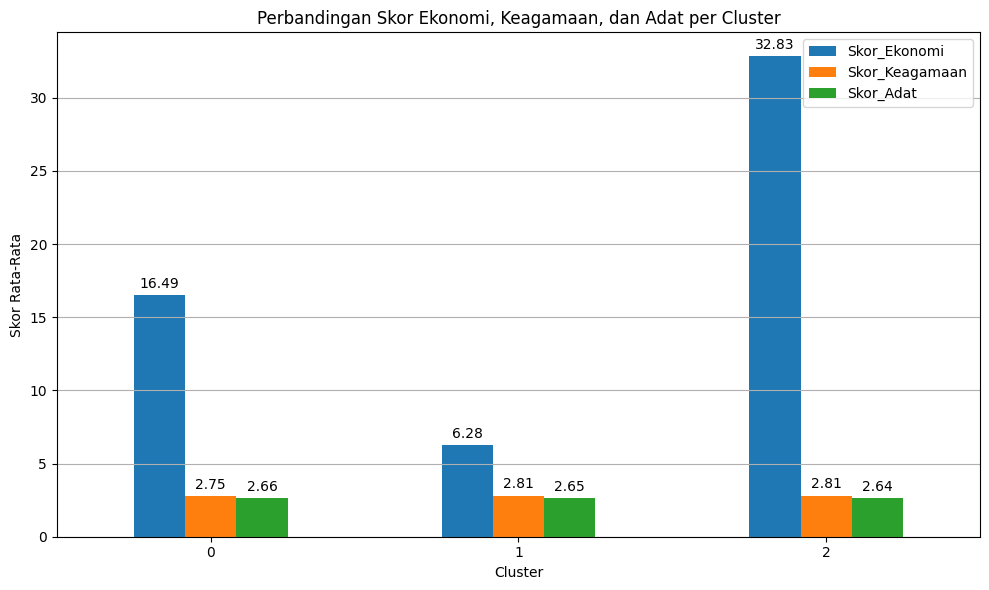

In [35]:
import matplotlib.pyplot as plt

plot_data = cluster_summary[['Skor_Ekonomi', 'Skor_Keagamaan', 'Skor_Adat']]
ax = plot_data.plot(kind='bar', figsize=(10,6))

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=3)

plt.title('Perbandingan Skor Ekonomi, Keagamaan, dan Adat per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Skor Rata-Rata')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Visualisasi Silhouette Score per Sampel
Visualisasi ini menunjukkan seberapa baik masing-masing sampel dikelompokkan ke dalam cluster-nya. Ukuran titik pada scatter plot PCA mencerminkan nilai Silhouette Score:
- Nilai mendekati 1: Sampel sangat cocok dengan klusternya.
- Nilai mendekati 0: Sampel berada di perbatasan antar kluster.
- Nilai negatif: Sampel kemungkinan masuk ke kluster yang salah.

Average Silhouette Score: 0.1358


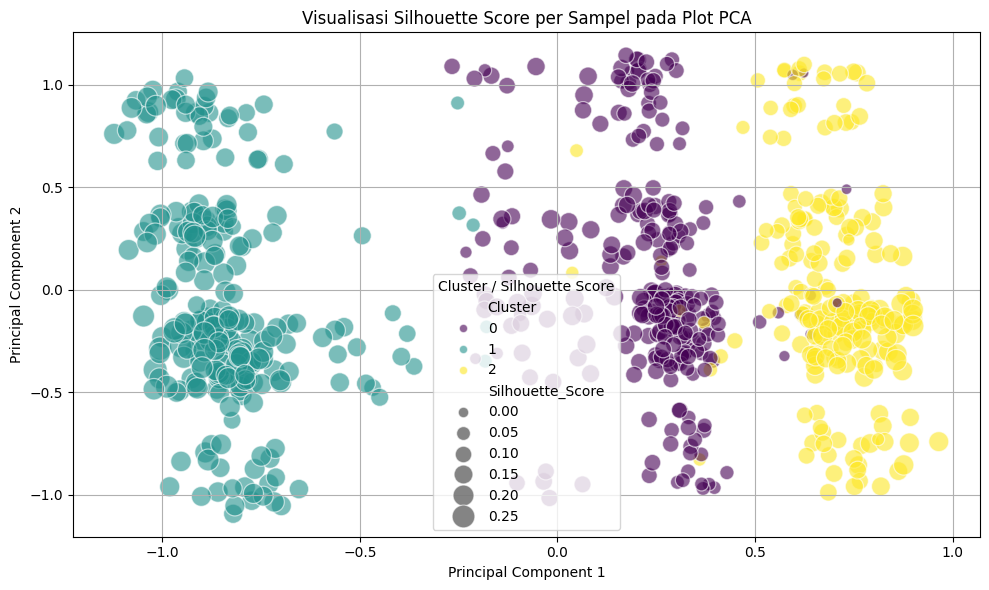

In [36]:
import matplotlib.pyplot as plt
import numpy as np
# Menghitung silhouette score untuk setiap sampel
sample_silhouette_values = silhouette_score(X_scaled_df, clusters, metric='euclidean', sample_size=len(X_scaled_df))
print(f"Average Silhouette Score: {sample_silhouette_values:.4f}")

from sklearn.metrics import silhouette_samples

# Menghitung silhouette score untuk setiap sampel
sample_silhouette_values = silhouette_samples(X_scaled_df, clusters)

# Menambahkan silhouette score sampel ke dataframe pca_df
pca_df['Silhouette_Score'] = sample_silhouette_values

# Visualisasi Silhouette Score per Sampel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue='Cluster', size='Silhouette_Score', sizes=(50, 300), alpha=0.6, palette='viridis')
plt.title('Visualisasi Silhouette Score per Sampel pada Plot PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster / Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi distribusi beberapa fitur kategorikal dalam dataset berdasarkan hasil klasterisasi dengan menggunakan count plot berwarna khusus, sehingga memudahkan analisis perbandingan jumlah responden di tiap kategori dan klaster secara jelas dan informatif.

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


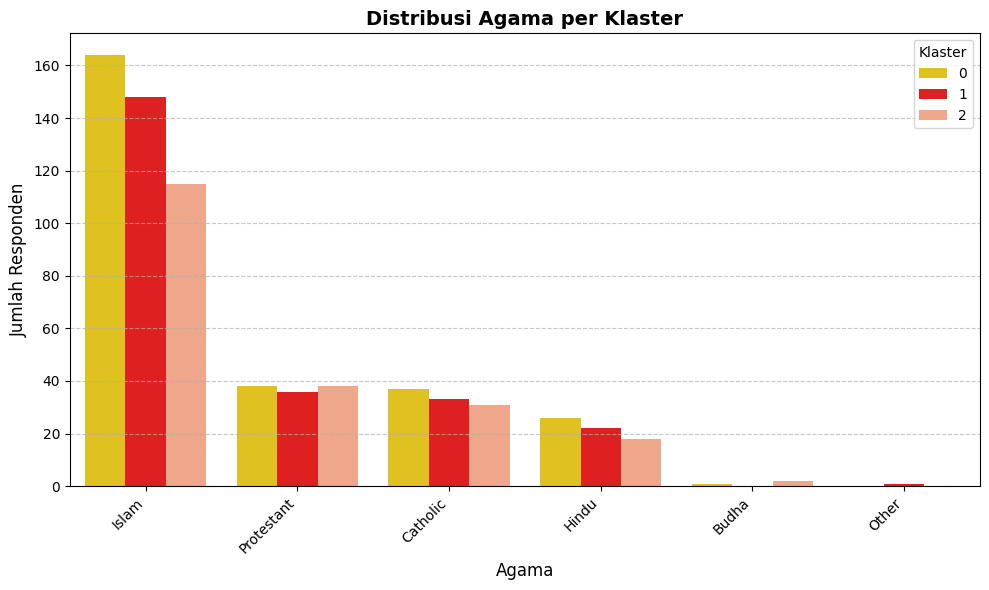

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


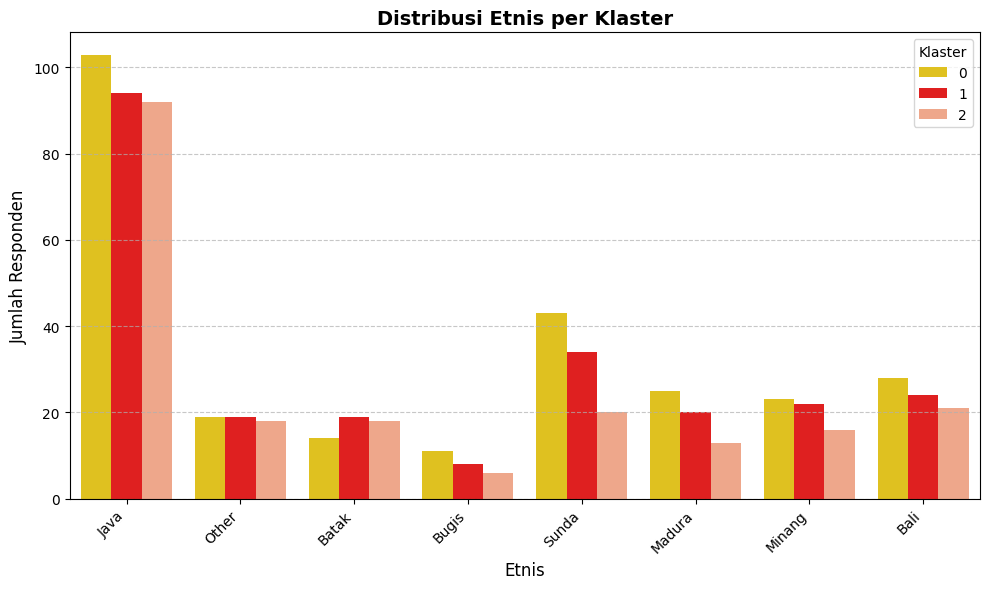

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


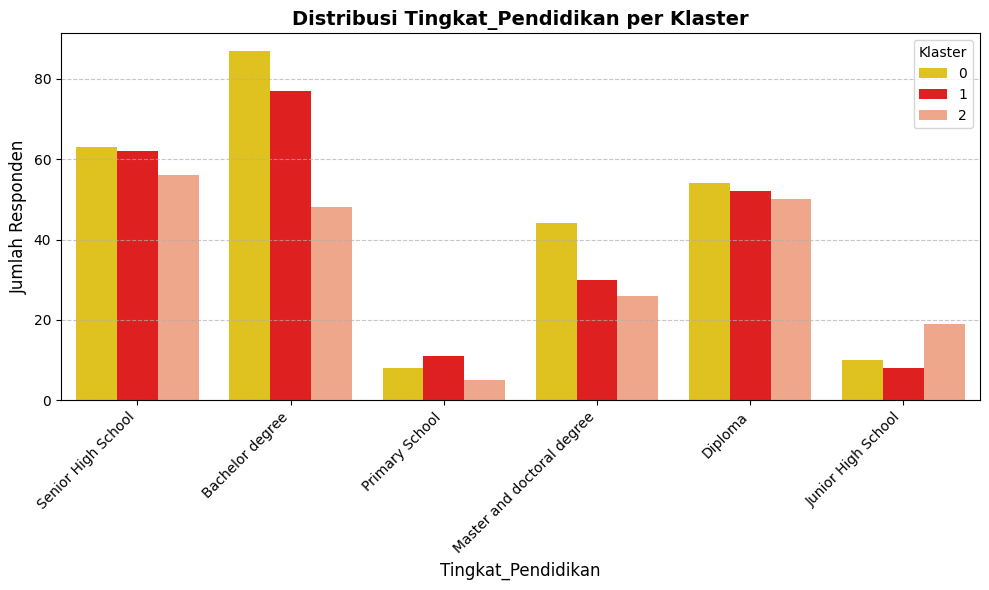

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


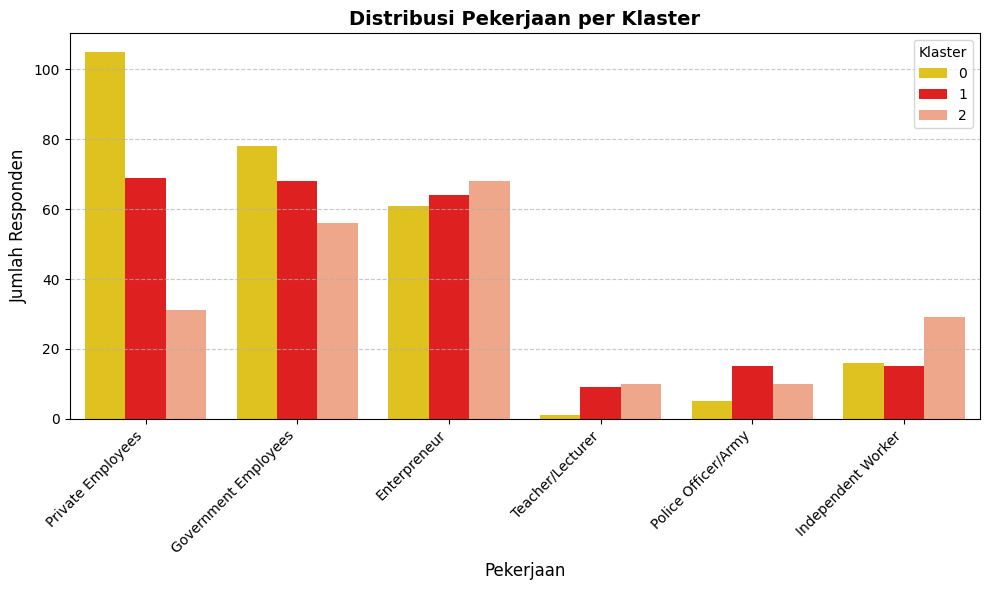

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


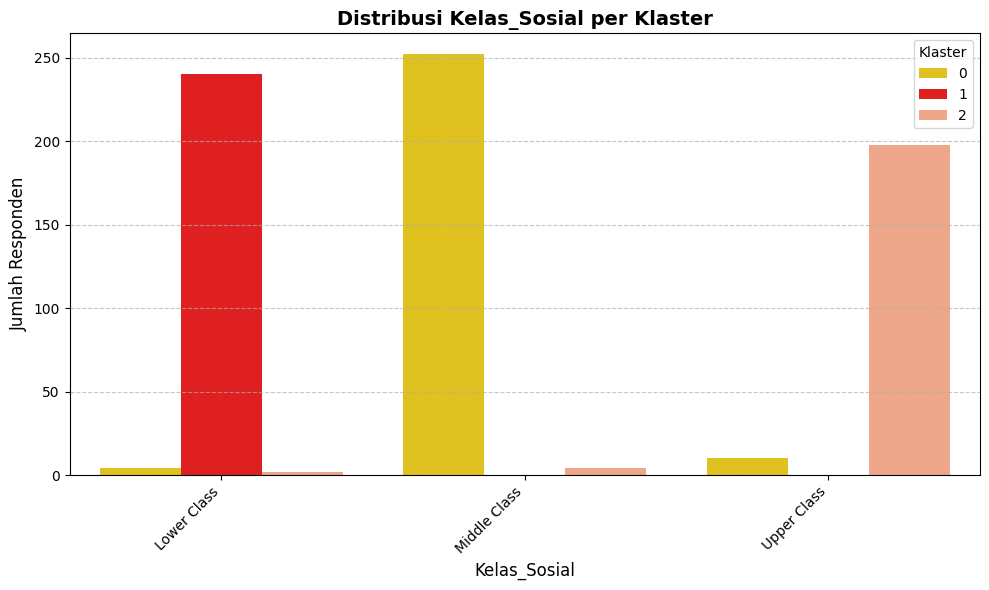

<ipython-input-37-4bb952df3a52>:30: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)


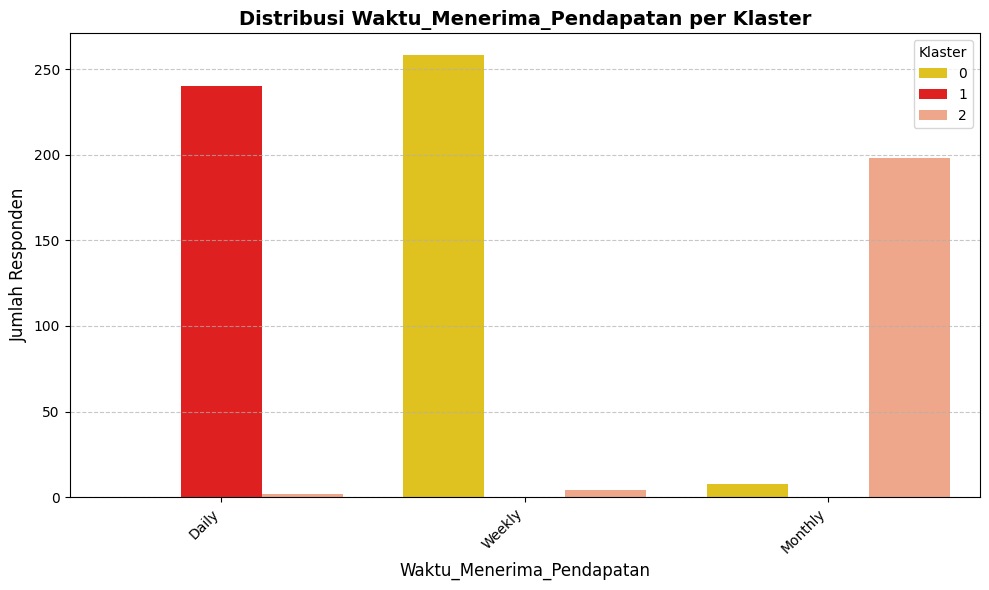

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitur kategorikal yang ingin divisualisasikan
categorical_features_to_visualize = [
    'Agama',
    'Etnis',
    'Tingkat_Pendidikan',
    'Pekerjaan',
    'Kelas_Sosial',
    'Waktu_Menerima_Pendapatan'
]

# Tambahkan kolom klaster ke data asli
food['Cluster'] = clusters

# Warna custom tanpa putih, tetap dalam nuansa kuning-merah
custom_palette = ['#FFD700', '#FF0000', '#FFA07A', '#FFA500', '#8B0000']
# Keterangan warna:
# '#FFD700' → kuning emas
# '#FF0000' → merah
# '#FFA07A' → salmon terang (ganti putih)
# '#FFA500' → oranye
# '#8B0000' → merah tua

# Loop untuk plot
for feature in categorical_features_to_visualize:
    if feature in food.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=food, x=feature, hue='Cluster', palette=custom_palette)
        plt.title(f'Distribusi {feature} per Klaster', fontsize=14, weight='bold')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Jumlah Responden', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Klaster')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Kolom kategorikal '{feature}' tidak ditemukan dalam dataframe asli.")

Membuat *(stacked bar chart*) untuk menampilkan distribusi jumlah responden dari berbagai provinsi di setiap klaster, untuk memudahkan analisis perbandingan komposisi provinsi dalam setiap klaster secara visual.

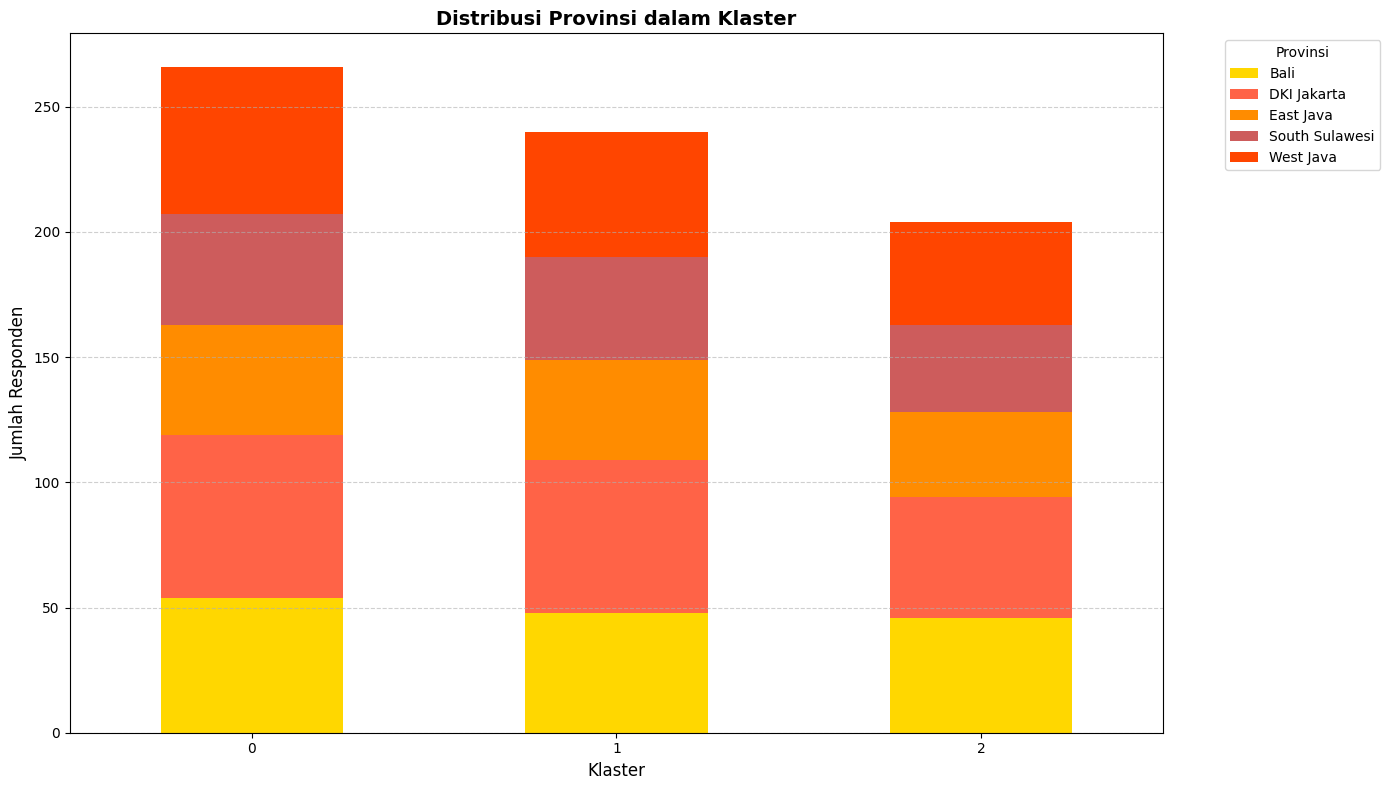

In [38]:
import matplotlib.pyplot as plt

# Hitung distribusi jumlah responden per klaster dan provinsi
cluster_province_distribution = food.groupby(['Cluster', 'Provinsi']).size().unstack(fill_value=0)

# Definisikan palet warna kustom (kuning, merah, oranye, tanpa putih)
custom_colors = [
    '#FFD700', '#FF6347', '#FF8C00', '#CD5C5C', '#FF4500', '#8B0000',
    '#FFA500', '#E9967A', '#B22222', '#DAA520', '#DC143C', '#D2691E',
    '#F4A460', '#FF7F50', '#FA8072', '#B22222', '#F08080', '#FFB347',
    '#F5DEB3', '#DEB887', '#D2691E', '#FFA07A', '#FF6F61', '#A0522D'
]
# Pastikan cukup warna untuk semua kolom provinsi
num_provinces = cluster_province_distribution.shape[1]
colors_to_use = custom_colors[:num_provinces]

# Plot stacked bar chart
cluster_province_distribution.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=colors_to_use
)

plt.title('Distribusi Provinsi dalam Klaster', fontsize=14, weight='bold')
plt.xlabel('Klaster', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Visualisasi hasil klasterisasi KMeans pada data yang telah direduksi dimensinya menggunakan PCA dengan menampilkan *scatter plot* dua komponen utama (PC1 dan PC2). Setiap titik mewakili data individu yang diberi warna berdasarkan klaster dan bentuk marker berdasarkan provinsi, serta menampilkan label centroid klaster untuk memudahkan interpretasi visual distribusi dan pemisahan klaster menurut provinsi.

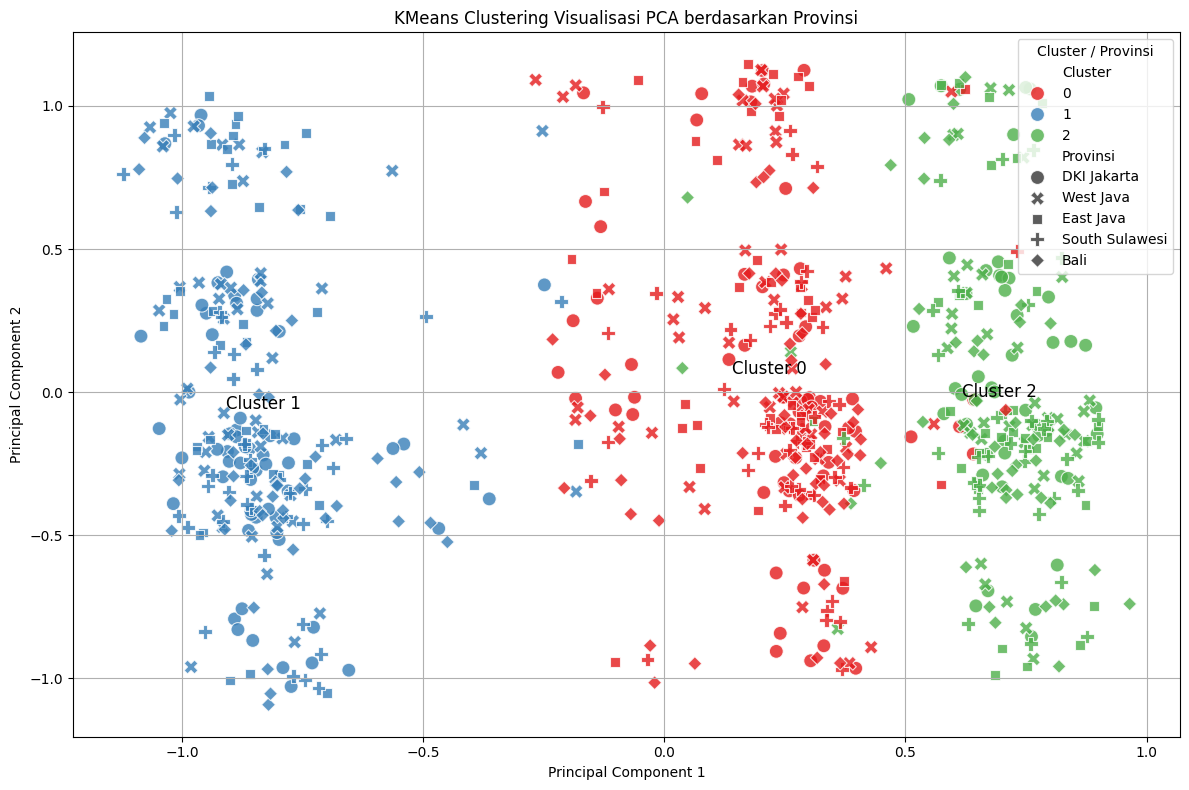

In [39]:
import matplotlib.pyplot as plt
# Add 'Provinsi' back to the dataframe for visualization
pca_df['Provinsi'] = food['Provinsi']
pca_df['Cluster'] = clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", style="Provinsi", palette="Set1", s=100, alpha=0.8)

# Add labels for each cluster centroid (optional but helpful)
centroids = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean().reset_index()
for index, row in centroids.iterrows():
    plt.text(row['PC1'], row['PC2'], f'Cluster {int(row["Cluster"])}', fontsize=12, ha='center')


plt.title("KMeans Clustering Visualisasi PCA berdasarkan Provinsi")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster / Provinsi")
plt.grid(True)
plt.tight_layout()
plt.show()